---

# Exploring King County Real Estate with PCA

In this notebook, we apply Principal Component Analysis (PCA) to the King County House Sales dataset to explore latent structure in housing features. PCA is a powerful technique for dimensionality reduction that transforms a dataset into a new coordinate system where the axes — called principal components — capture the directions of greatest variance in the data.

Mathematically, PCA finds the eigenvectors of the covariance matrix of the standardized data. These eigenvectors define an orthogonal basis, and their corresponding eigenvalues indicate how much variance is captured by each component. The first principal component (PC1) is the direction along which the data varies the most, the second (PC2) is orthogonal to the first and captures the next most variance, and so on.

PCA is especially useful when:

- The dataset contains highly correlated features

- We want to reduce dimensionality while preserving the most important information

- We want to visualize complex datasets in 2D or 3D

- We aim to identify underlying factors or structure in the data

This dataset includes information on over 21,000 property sales in the Seattle area, with features such as square footage, number of bedrooms, condition, and year built. By applying PCA to the standardized numeric variables, we aim to:

- Project the dataset onto a 2D plane for visualization

- Understand how different features contribute to variance in home characteristics

- Reveal hidden structure that may correlate with housing prices

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

---

Download the dataset from Kaggle and view the dataframe.

---

In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\kylej\.cache\kagglehub\datasets\harlfoxem\housesalesprediction\versions\1


In [12]:
df = pd.read_csv("kc_house_data.csv")

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


---

We can not drop the non-numeric columns to make our PCA run more smoothly and drop rows with missing values. We then seperate our features and target vectors, as always.

---

In [ ]:
# Drop ID, date, and non-numeric columns
df = df.drop(columns=['id', 'date'])

# drop location info for pure numeric PCA
df = df.drop(columns=['zipcode', 'lat', 'long'])

# Drop rows with missing values if any
df.dropna(inplace=True)

# Separate features and target
X = df.drop(columns='price')  # price can be kept or dropped


---

Standardize our data.

---

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---

We can now see how much variance we were able to explain using our PCA.

---

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance (2 components): {pca.explained_variance_ratio_.sum():.2%}")

Explained variance (2 components): 46.38%


---

It looks like we explained about 46% of the variance in the dataset. This isn't perfect, but it's still a significnat chunk of the overall variance for such a large dataset! With further preprocessing and refinement, we could certainly increase this value. Let's graph our PCA and see how we did.

---

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

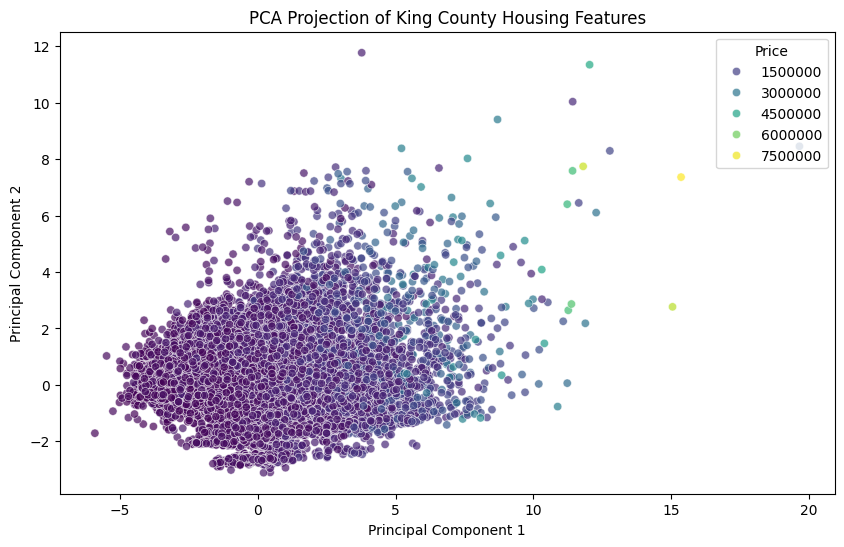

In [20]:
# Add PCA components and price for coloring
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['price'] = df['price'].values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='price', palette='viridis', alpha=0.7)
plt.title("PCA Projection of King County Housing Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Price", loc='upper right')
plt.colorbar(label='Price')
plt.grid(True)
plt.show()

---

Again, although our PCA isn't perfect, it was able to explain a good amount of variance! We can see in the above graph that there is a very clear gradient from bottom left to top right of price value increasing, which our PCA helped us visualize in two dimensions. We can also take a look at the weights:

---

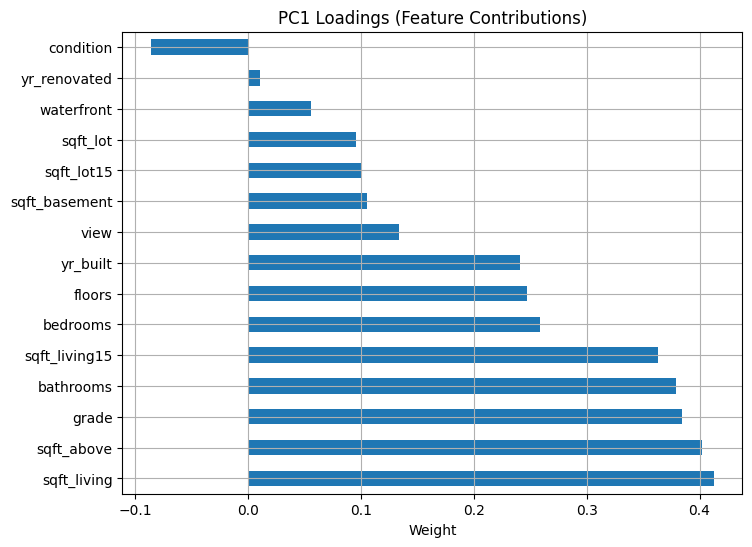

In [22]:
# Show loading weights (how features contribute to each component)
loadings = pd.Series(pca.components_[0], index=X.columns)
loadings.sort_values(key=None, ascending=False).plot(kind='barh', figsize=(8, 6))
plt.title("PC1 Loadings (Feature Contributions)")
plt.xlabel("Weight")
plt.grid(True)
plt.show()

---

Our PCA revealed some interesting things! Namely, the condition of the house didn't seem to matter at all, wherease the square footage was by-far the most important factor in sales price. We can see how PCA is thus a powerful tool for both categorizing data and revealing the relative importance if different features.

---